## How does pytorch matrix multiplication wall clock time compare with different batch sizes?

In [1]:
%cd data_temp

/mnt/home/yegonkim/home/lupi/data_temp


In [2]:
import torch
import time
from matplotlib import pyplot as plt

from generate_data import main

class Args:
    def __init__(self):
        self.experiment = 'KdV'
        self.device = 'cpu'
        self.end_time = 100.
        self.nt = 250
        self.nt_effective = 140
        self.nx = 256
        self.L = 128.
        self.train_samples = 0
        self.valid_samples = 0
        self.test_samples = 0
        self.batch_size = 1
        self.suffix = ''
        self.log = False
        self.solver = 'dopri5'
        self.nu = 0.01

args = Args()
args.experiment = 'KdV'
args.train_samples = 16
args.valid_samples = 0
args.test_samples = 0
args.L = 128.
args.suffix = 'default'
args.batch_size = 10000
args.device = 'cuda'

for train_samples in [16, 32, 64, 128, 256, 512, 1024, 2048]:
    args.train_samples = train_samples
    main(args)

Data directory exists and will be written to.
Generating data
File data/KdV_train_16_default.h5 is deleted.
File data/KdV_valid_0_default.h5 is kept.
File data/KdV_test_0_default.h5 is kept.
Equation: KdV
Mode: train
Number of samples: 16
Solved indices: 0 : 9999
Solved batches: 1 of 1
Time elapsed: 111.82 seconds

Data saved


Data directory exists and will be written to.
Generating data
File data/KdV_valid_0_default.h5 is kept.
File data/KdV_test_0_default.h5 is kept.
No file data/KdV_train_32_default.h5 exists yet.
Equation: KdV
Mode: train
Number of samples: 32
Solved indices: 0 : 9999
Solved batches: 1 of 1
Time elapsed: 98.13 seconds

Data saved


Data directory exists and will be written to.
Generating data
File data/KdV_valid_0_default.h5 is kept.
No file data/KdV_train_64_default.h5 exists yet.
File data/KdV_test_0_default.h5 is kept.
Equation: KdV
Mode: train
Number of samples: 64
Solved indices: 0 : 9999
Solved batches: 1 of 1
Time elapsed: 98.52 seconds

Data saved


Data d

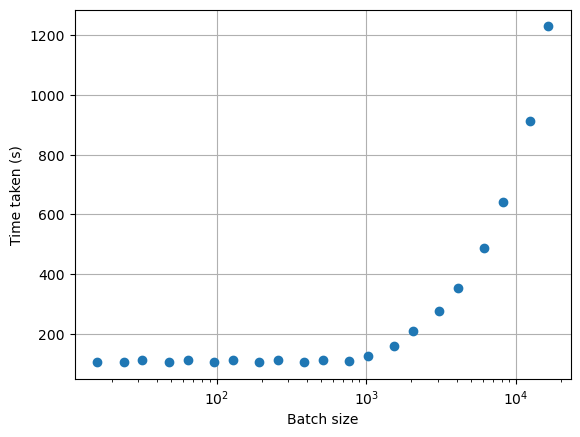

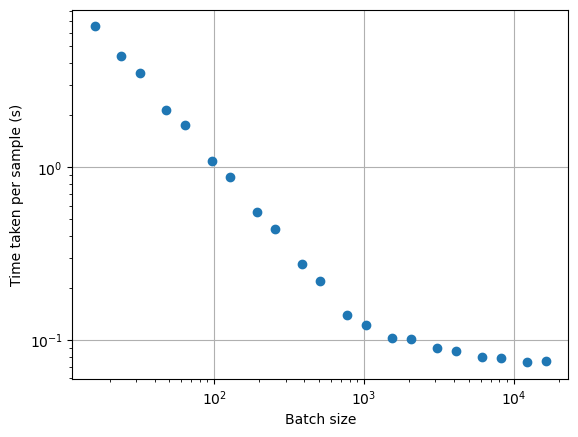

In [1]:
from matplotlib import pyplot as plt

train_samples = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288]
time_taken = [104.66, 111.82, 112.83, 111.95, 112.36, 112.99, 125.15, 206.94, 352.51, 641.25, 1230.52, 105.13, 103.53, 103.98, 105.82, 105.74, 106.93, 158.38, 277.33, 488.13, 912.68]
efficiency = [time_taken[i] / train_samples[i] for i in range(len(train_samples))]

# plt.figure()
# plt.plot(train_samples, time_taken, 'o')
# plt.xlabel('Batch size')
# plt.ylabel('Time taken (s)')
# plt.grid()
# plt.xscale('log')
# # plt.yscale('log')
# plt.show()

plt.figure()
plt.plot(train_samples, efficiency, 'o')
plt.xlabel('Batch size')
plt.ylabel('Time taken per sample (s)')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()

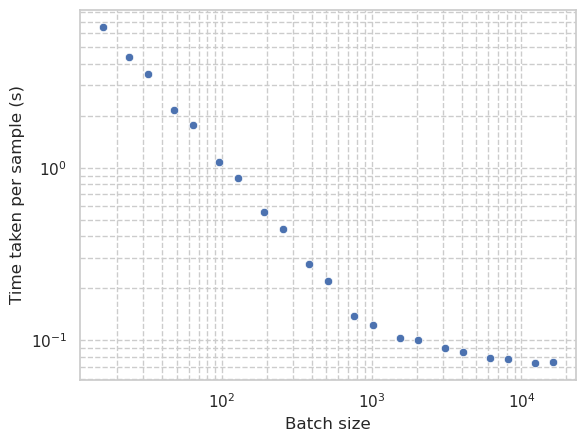

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
train_samples = [16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144, 12288]
time_taken = [104.66, 111.82, 112.83, 111.95, 112.36, 112.99, 125.15, 206.94, 352.51, 641.25, 1230.52, 105.13, 103.53, 103.98, 105.82, 105.74, 106.93, 158.38, 277.33, 488.13, 912.68]
efficiency = [time_taken[i] / train_samples[i] for i in range(len(train_samples))]

# Initialize the Seaborn theme
sns.set(style="whitegrid")

# Plot the time taken per sample with Seaborn
plt.figure()
sns.scatterplot(x=train_samples, y=efficiency)

# Customize the plot
plt.xlabel('Batch size')
plt.ylabel('Time taken per sample (s)')
plt.grid(True, which="both", ls="--")
plt.xscale('log')
plt.yscale('log')

# Show plot
plt.show()
